## Métodos de Otimização: Métodos de procura multidimensional

### Steepest Descent - Diferenças finitas

__Imports:__

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys, os
import time
name = 'Steepest Descent' 
Start = time.time()

__Função Avaliada:__

In [2]:
def f(x,nFunc,nVar,countFunc):
    f = open("var.dat", "w")
    f.write(str(nFunc)+"\n")
    f.write(str(nVar)+"\n")
    for i in range(0, len(x)):
        f.write(str(x[i])+'\n')
    f.close()
    
    result = os.system("funcao.exe")
    
    f = open("obj.dat", "r")
    u = float(f.read())
    f.close()
    countFunc += 1
    return u,countFunc

__Método:__

In [3]:
def grad(x,countFunc):
    epsilon = 1.e-10
    nFunc = 34; Qvar = 12
    
    for i in range(0,len(x)):
        xtmp=x.copy()
        xtmp[i]=xtmp[i]+epsilon
        F_xtmp, countFunc = f(xtmp,nFunc,Qvar,countFunc)
        F_x, countFunc = f(x,nFunc,Qvar,countFunc)
        G[i]=(F_xtmp-F_x)/epsilon
    
    return G,countFunc

In [4]:
nFunc = 34; Qvar = 12
alfa=0.1; kmax=50; k=0; countFunc=0

xold =np.zeros(Qvar , dtype = 'float')
xnew =np.zeros(Qvar , dtype = 'float')
G =np.zeros(Qvar , dtype = 'float')
#chute incial:
xold[0] = -36
xold[1] = -45
xold[2] = -50
xold[3] = -55
xold[4] = -59
xold[5] = -62
xold[6] = -65
xold[7] = -68
xold[8] = -70
xold[9] = -73
xold[10] = -75
xold[11] = -77

F0,countFunc = f(xold,nFunc,Qvar,countFunc)
layout = "{0:.5f}"
fHist = []
for i in range(0, Qvar):
    print(layout.format(xold[i]), end =" ")
print(layout.format(F0))
fHist.append(F0)

while k < kmax:
    k += 1
    
    # Calculo Gradiente
    G,countFunc = grad(xold,countFunc)
    
    # Processo iterativo
    xnew=xold-alfa*G
    
    #Atualiza xold
    xold = xnew.copy()
    
    #Calculo da função
    F,countFunc = f(xnew,nFunc,Qvar,countFunc)
    for i in range(0, Qvar):
        print(layout.format(xnew[i]), end =" ")
    print(layout.format(F))
    fHist.append(F)

-36.00000 -45.00000 -50.00000 -55.00000 -59.00000 -62.00000 -65.00000 -68.00000 -70.00000 -73.00000 -75.00000 -77.00000 3.70848
-36.10000 -45.02107 -50.26487 -55.05997 -59.00998 -62.11136 -65.07066 -68.00072 -70.19483 -73.00000 -75.00000 -77.00000 2.76649
-36.20000 -45.03793 -50.40146 -55.10184 -59.01895 -62.15907 -65.10733 -68.00143 -70.21747 -73.00000 -75.00000 -77.00000 2.46208
-36.30000 -45.05142 -50.48835 -55.13351 -59.02707 -62.19065 -65.13264 -68.00213 -70.23437 -73.00000 -75.00000 -77.00000 2.27003
-36.40000 -45.06221 -50.54944 -55.15868 -59.03447 -62.21421 -65.15196 -68.00282 -70.24786 -73.00000 -75.00000 -77.00000 2.12022
-36.50001 -45.07085 -50.59512 -55.17937 -59.04127 -62.23293 -65.16755 -68.00350 -70.25908 -73.00000 -75.00000 -77.00000 1.99005
-36.60002 -45.07776 -50.63073 -55.19680 -59.04755 -62.24840 -65.18059 -68.00417 -70.26867 -73.00000 -75.00000 -77.00000 1.87035
-36.70003 -45.08329 -50.65936 -55.21177 -59.05337 -62.26154 -65.19177 -68.00484 -70.27704 -73.00000 -75.

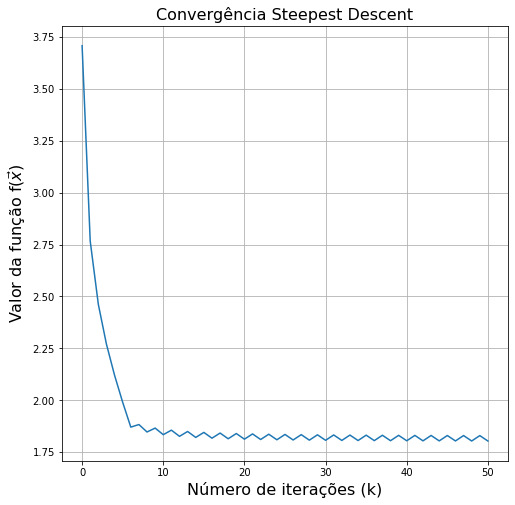

In [5]:
font = {
        'size': 16,
        }

plt.figure(figsize=(8,8))
plt.plot(np.arange(0,k+1),fHist)
plt.grid()
plt.title(f'Convergência {name}', fontdict=font)
plt.ylabel(r'Valor da função f($\vec{x}$)', fontdict=font)
plt.xlabel("Número de iterações (k)", fontdict=font)
plt.show()

In [6]:
print("Quantidade de chamadas da função obj = ", countFunc)
End = time.time()
print("Tempo de Execução =", End-Start, "s")	

Quantidade de chamadas da função obj =  1251
Tempo de Execução = 23.32480239868164 s
